In [1]:
import os
import sys
import pandas as pd
import geopandas as gpd
import pygeos as pg
import numpy as np
import tensorflow as tf
import sqlalchemy as sq
import ipyparallel as ipp
from IPython.display import clear_output
from matplotlib import pyplot as plt
from shapely import wkt

In [2]:
# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 100
pd.options.display.float_format = "{:.1f}".format
pd.set_option("display.max_columns", None)
os.chdir("F:\\Desktop\\Desktop\\Work\\ML")

In [3]:
def getGPDfromPD(
    df: pd.DataFrame, geomCol: str, crs: str = "EPSG:3978"
) -> gpd.GeoDataFrame:
    """
    Convert a pandas dataframe to a geopandas dataframe
    :param df: pandas dataframe
    :param geomCol: name of the geometry column
    :param crs: coordinate reference system
    :return: geopandas dataframe
    """
    if "geom" in df.columns:
        df.rename(columns={"geom": "geometry"}, inplace=True)

    df[geomCol] = df[geomCol].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry=geomCol, crs=crs)
    return gdf

In [4]:
stations = "climate_station_list"
dfStations = pd.read_csv(stations + ".csv")
gdfStations = gpd.GeoDataFrame(
    dfStations, geometry=gpd.points_from_xy(dfStations.Longitude, dfStations.Latitude)
)
gdfStations = gdfStations.loc[dfStations["HLY Last Year"] > 2009]

In [5]:
gdfStations = gdfStations.set_crs("EPSG:4326", allow_override=True)
gdfStations = gdfStations.to_crs("EPSG:3347")

In [6]:
cr = "RegionsProjected3347.csv"
dfCR = pd.read_csv(cr)
gdfCR = getGPDfromPD(dfCR, "geometry")
gdfCR.set_crs("EPSG:3347", allow_override=True, inplace=True)

,CARuid,CARname,PRuid,AGuid,geometry,color,CRnum,Province
0,4601,Census Agricultural Region 1,46.0,460100000,"POLYGON ((5614040.030 1525793.204, 5614049.916...",#FF0000,3,MB
1,4602,Census Agricultural Region 2,46.0,460200000,"POLYGON ((5626194.299 1583517.983, 5626196.761...",#FF0000,3,MB
2,4603,Census Agricultural Region 3,46.0,460300000,"POLYGON ((5604868.041 1657581.280, 5604597.366...",#FF0000,3,MB
3,4604,Census Agricultural Region 4,46.0,460400000,"POLYGON ((5572893.654 1735557.501, 5572702.245...",#FF7F00,2,MB
4,4605,Census Agricultural Region 5,46.0,460500000,"POLYGON ((5642129.777 1764975.307, 5640570.825...",#FF7F00,2,MB
5,4606,Census Agricultural Region 6,46.0,460600000,"POLYGON ((5650771.936 1802331.590, 5650891.341...",#FF7F00,2,MB
6,4607,Census Agricultural Region 7,46.0,460700000,"POLYGON ((5699696.737 1638839.856, 5699169.985...",#FFFF00,1,MB
7,4608,Census Agricultural Region 8,46.0,460800000,"POLYGON ((5811211.812 1504579.905, 5813077.828...",#FF0000,3,MB
8,4609,Census Agricultural Region 9,46.0,460900000,"POLYGON ((5881996.131 1582644.382, 5881995.457...",#FFFF00,1,MB
9,4610,Census Agricultural Region 10,46.0,461000000,"MULTIPOLYGON (((5963272.940 1505971.912, 59632...",#FFFF00,1,MB


# drop first 3 columns
gdfCR = gdfCR.iloc[:, 3:]

gdfCR['Province'] = "None"

# set province MB if PRuid 46.0
gdfCR.loc[gdfCR['PRuid'] == 46.0, 'Province'] = "MB"

# set province SK if PRuid 47.0
gdfCR.loc[gdfCR['PRuid'] == 47.0, 'Province'] = "SK"

# set province AB if PRuid 48.0
gdfCR.loc[gdfCR['PRuid'] == 48.0, 'Province'] = "AB"

# write back out
gdfCR.to_csv("RegionsProjected3347.csv", index=False)

In [7]:
minx, miny, maxx, maxy = gdfCR.total_bounds

<AxesSubplot:>

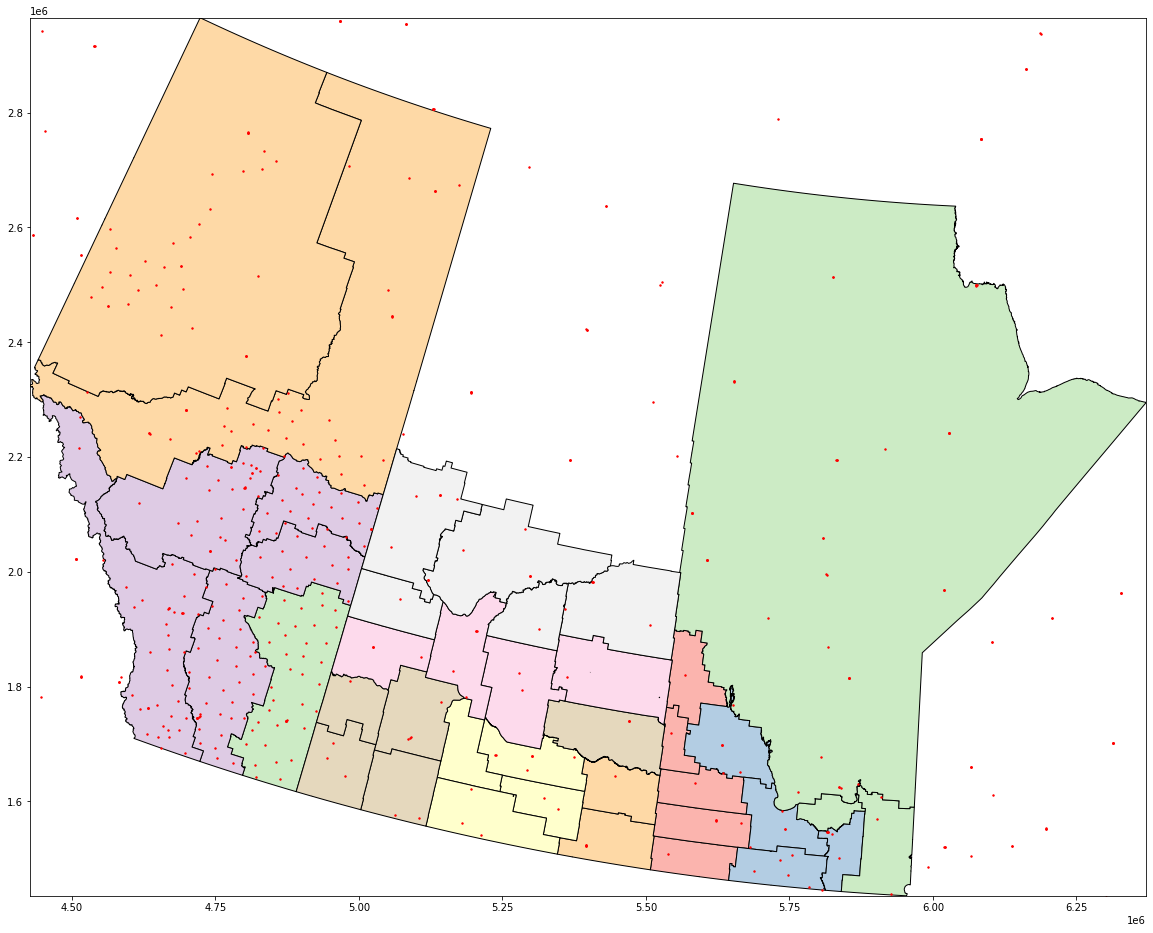

In [8]:
# plot using color column
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny, maxy)
ax.set_xlim(minx, maxx)
gdfCR.plot(ax=ax, color=gdfCR["color"], cmap="Pastel1", edgecolor="black")
gdfStations.plot(ax=ax, color="red", markersize=2)

In [9]:
gdfSelected = gdfStations.copy(deep=True)

# keep stations from ALBERTA, SASKATCHEWAN, MANITOBA
gdfSelected = gdfSelected.loc[
    gdfSelected["Province"].isin(["ALBERTA", "SASKATCHEWAN", "MANITOBA"])
]

# use gdfCR to sjoin within gdfSelected
gdfSelected = gpd.sjoin(gdfCR, gdfSelected, how="left", op="contains")

In [10]:
gdfCR.count()
gdfSelected.count()

CARuid            420
CARname           420
PRuid             420
AGuid             420
geometry          420
color             420
CRnum             420
Province_left     420
index_right       419
Station Name      419
Province_right    419
Latitude          419
Longitude         419
Elevation         419
Climate ID        419
WMO Identifier    329
TC Identifier     410
First Year        419
Last Year         419
HLY First Year    419
HLY Last Year     419
DLY First Year    412
DLY Last Year     412
MLY First Year    253
MLY Last Year     253
dtype: int64

In [11]:
gdfSelected = gdfSelected.dropna(subset=["DLY First Year"])

In [12]:
gdfSelected.count()

CARuid            412
CARname           412
PRuid             412
AGuid             412
geometry          412
color             412
CRnum             412
Province_left     412
index_right       412
Station Name      412
Province_right    412
Latitude          412
Longitude         412
Elevation         412
Climate ID        412
WMO Identifier    329
TC Identifier     403
First Year        412
Last Year         412
HLY First Year    412
HLY Last Year     412
DLY First Year    412
DLY Last Year     412
MLY First Year    253
MLY Last Year     253
dtype: int64

In [13]:
# keep only CRnum > 0
gdfSelected = gdfSelected.loc[gdfSelected["CRnum"] > 0]


gdfSask = gdfSelected.loc[gdfSelected["Province_left"] == "SK"]
gdfMan = gdfSelected.loc[gdfSelected["Province_left"] == "MB"]
gdfAlb = gdfSelected.loc[gdfSelected["Province_left"] == "AB"]

# get unique list of climate ids
saskList = gdfSask["Climate ID"].unique().tolist()
manList = gdfMan["Climate ID"].unique().tolist()
albList = gdfAlb["Climate ID"].unique().tolist()

In [14]:
def push_data(df: pd.DataFrame, tableName: str, header: bool = False) -> None:
    df.to_csv(tableName + ".csv", index=False, mode="a", header=header)

In [15]:
def validateColumnNames(curr: list, exp: list) -> bool:
    for name in curr:
        if name not in exp:
            return False
    return True

In [16]:
def dataProcessHourly(df: pd.DataFrame) -> None:
    NULLFLAG = -9999
    try:
        # discard	discard	discard	keep	discard	discard	keep	keep	keep	keep	keep	keep	discard	keep	discard	discard	discard	keep	discard	keep	discard	keep	discard	discard	discard	keep	discard	keep	discard	keep	discard
        # x	y	STATION_NAME	CLIMATE_IDENTIFIER	ID	LOCAL_DATE	PROVINCE_CODE	LOCAL_YEAR	LOCAL_MONTH	LOCAL_DAY	LOCAL_HOUR	TEMP	TEMP_FLAG	DEW_POINT_TEMP	DEW_POINT_TEMP_FLAG	HUMIDEX	HUMIDEX_FLAG	PRECIP_AMOUNT	PRECIP_AMOUNT_FLAG	RELATIVE_HUMIDITY	RELATIVE_HUMIDITY_FLAG	STATION_PRESSURE	STATION_PRESSURE_FLAG	VISIBILITY	VISIBILITY_FLAG	WINDCHILL	WINDCHILL_FLAG	WIND_DIRECTION	WIND_DIRECTION_FLAG	WIND_SPEED	WIND_SPEED_FLAG

        df.drop(
            columns=[
                "x",
                "y",
                "STATION_NAME",
                "ID",
                "LOCAL_DATE",
                "TEMP_FLAG",
                "DEW_POINT_TEMP_FLAG",
                "HUMIDEX",
                "HUMIDEX_FLAG",
                "PRECIP_AMOUNT_FLAG",
                "RELATIVE_HUMIDITY_FLAG",
                "STATION_PRESSURE_FLAG",
                "VISIBILITY",
                "VISIBILITY_FLAG",
                "WINDCHILL_FLAG",
                "WIND_DIRECTION_FLAG",
                "WIND_SPEED_FLAG",
            ],
            inplace=True,
        )
    except:
        df.to_csv(
            "Failed/" + str(df.iloc[0, 0]) + "_unexpected_column_names.csv", index=False
        )

    expList = [
        "CLIMATE_IDENTIFIER",
        "PROVINCE_CODE",
        "LOCAL_YEAR",
        "LOCAL_MONTH",
        "LOCAL_DAY",
        "LOCAL_HOUR",
        "TEMP",
        "DEW_POINT_TEMP",
        "PRECIP_AMOUNT",
        "RELATIVE_HUMIDITY",
        "STATION_PRESSURE",
        "WINDCHILL",
        "WIND_DIRECTION",
        "WIND_SPEED",
    ]
    currList = list(df.columns.values)

    if validateColumnNames(currList, expList):
        df.rename(columns={df.columns[0]: "ClimateID"}, inplace=True)
        df.rename(columns={df.columns[1]: "ProvinceCode"}, inplace=True)
        df.rename(columns={df.columns[2]: "Year"}, inplace=True)
        df.rename(columns={df.columns[3]: "Month"}, inplace=True)
        df.rename(columns={df.columns[4]: "Day"}, inplace=True)
        df.rename(columns={df.columns[5]: "Hour"}, inplace=True)
        df.rename(columns={df.columns[6]: "Temp"}, inplace=True)
        df.rename(columns={df.columns[7]: "DewPointTemp"}, inplace=True)
        df.rename(columns={df.columns[8]: "PrecipAmount"}, inplace=True)
        df.rename(columns={df.columns[9]: "RelativeHumidity"}, inplace=True)
        df.rename(columns={df.columns[10]: "StationPressure"}, inplace=True)
        df.rename(columns={df.columns[11]: "WindChill"}, inplace=True)
        df.rename(columns={df.columns[12]: "WindDirection"}, inplace=True)
        df.rename(columns={df.columns[13]: "WindSpeed"}, inplace=True)

        # df.dropna(subset=['Temp'], inplace=True)
        df.loc[df["Temp"].isnull(), "Temp"] = NULLFLAG
        df.loc[df["DewPointTemp"].isnull(), "DewPointTemp"] = NULLFLAG
        df.loc[df["PrecipAmount"].isnull(), "PrecipAmount"] = NULLFLAG
        df.loc[df["RelativeHumidity"].isnull(), "RelativeHumidity"] = NULLFLAG
        df.loc[df["StationPressure"].isnull(), "StationPressure"] = NULLFLAG
        df.loc[df["WindChill"].isnull(), "WindChill"] = NULLFLAG
        df.loc[df["WindDirection"].isnull(), "WindDirection"] = NULLFLAG
        df.loc[df["WindSpeed"].isnull(), "WindSpeed"] = NULLFLAG

        df[["ClimateID", "ProvinceCode"]] = df[["ClimateID", "ProvinceCode"]].astype(
            str
        )
        df[["Year", "Month", "Day", "Hour"]] = df[
            ["Year", "Month", "Day", "Hour"]
        ].astype(int)
        df[
            [
                "Temp",
                "DewPointTemp",
                "PrecipAmount",
                "RelativeHumidity",
                "StationPressure",
                "WindChill",
                "WindDirection",
                "WindSpeed",
            ]
        ] = df[
            [
                "Temp",
                "DewPointTemp",
                "PrecipAmount",
                "RelativeHumidity",
                "StationPressure",
                "WindChill",
                "WindDirection",
                "WindSpeed",
            ]
        ].astype(
            float
        )

        # we try a db push, but if it fails, we place the data in a csv file
        # try:
        push_data(df, "WeatherDataHourlyTwentyYear")
        # db_con.execute(
        #     "UPDATE public.\"TenYrStationsHourly\" SET \"dataAvailable\" = True WHERE \"ClimateID\" like CAST(\'{}\' AS TEXT);".format(stationID))
        # except:
        #     df.to_csv("Failed/" + str(df.iloc[0, 0]) +
        #             "_data_failed_dbpush.csv", index=False)
    else:
        df.to_csv(
            "Failed/" + str(df.iloc[0, 0]) + "_error_column_names.csv", index=False
        )

In [17]:
idList = [saskList, manList, albList]
STARTDATE = "2020-01-01"
ENDDATE = "2022-10-01"
baseUrl = (
    "https://api.weather.gc.ca/collections/climate-hourly/items?datetime="
    + STARTDATE
    + "%2000:00:00/"
    + ENDDATE
    + "%2000:00:00&CLIMATE_IDENTIFIER="
)
midUrl = (
    "&sortby=PROVINCE_CODE,CLIMATE_IDENTIFIER,LOCAL_DATE&f=csv&limit=10000&startindex="
)
index = 0
offset = 10000

In [18]:
for currList in idList:
    for id in currList:
        try:
            currIndex = 0
            for i in range(200):
                df = pd.read_csv(baseUrl + id + midUrl + str(currIndex))
                dataProcessHourly(df)
                currIndex += offset
                # print("Completed " + id + " " + str(currIndex))

        except:
            print("Station: {} last offset below: {}".format(id, currIndex))
            continue

Station: 4012403 last offset below: 30000
Station: 4012401 last offset below: 0
Station: 4012410 last offset below: 30000
Station: 4012400 last offset below: 0
Station: 4010879 last offset below: 30000
Station: 401HP5R last offset below: 30000
Station: 4019041 last offset below: 30000
Station: 4010811 last offset below: 30000
Station: 4013480 last offset below: 30000
Station: 4016699 last offset below: 30000
Station: 4016566 last offset below: 30000
Station: 4016560 last offset below: 0
Station: 4015322 last offset below: 30000
Station: 4015320 last offset below: 10000
Station: 40318MN last offset below: 30000
Station: 4036844 last offset below: 30000
Station: 4020286 last offset below: 30000
Station: 4028060 last offset below: 30000
Station: 4028038 last offset below: 30000
Station: 4028040 last offset below: 0
Station: 4024714 last offset below: 30000
Station: 4034910 last offset below: 30000
Station: 4038412 last offset below: 30000
Station: 4032322 last offset below: 30000
Station: